# Dataset

In [1]:
import sys
sys.path.append('../')

from data import datasets
from data import transforms, utils

In [2]:
transform = transforms.Compose(
    [transforms.Ignore(difficult=True),
     transforms.Normalize(),
     transforms.ToCentroids(),
     transforms.Resize((300, 300)), # if resizing first, can't be normalized
     transforms.OneHot(class_nums=datasets.VOC_class_nums),
     transforms.ToTensor()]
)

train_dataset = datasets.Compose(datasets.VOC_class_nums, datasets=(datasets.VOC2007Dataset, datasets.VOC2012_TrainValDataset), transform=transform)


In [3]:
from models.core.boxes import center2minmax
from models.core.inference import toVisualizeRectangleimg

[[ 84  45 300 297]]
(84, 45) (300, 297)


<IPython.core.display.Javascript object>


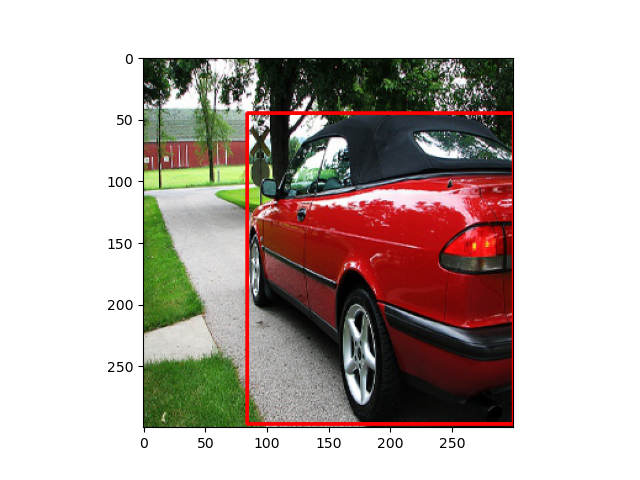

[[ 31 149 100 299]]
(31, 149) (100, 299)


<IPython.core.display.Javascript object>


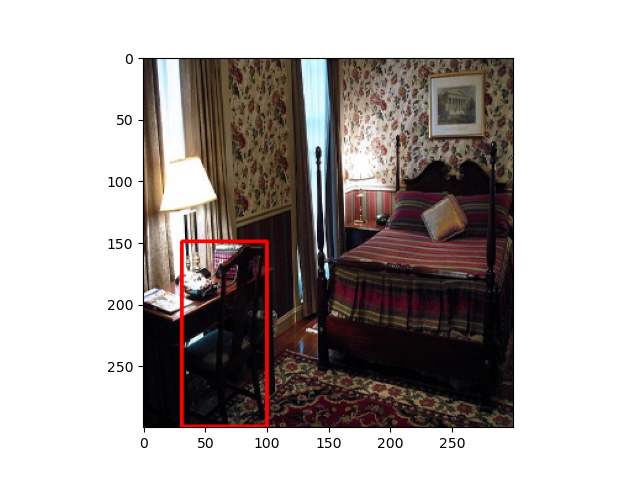

[[ 65  57 193 142]]
(65, 57) (193, 142)


<IPython.core.display.Javascript object>


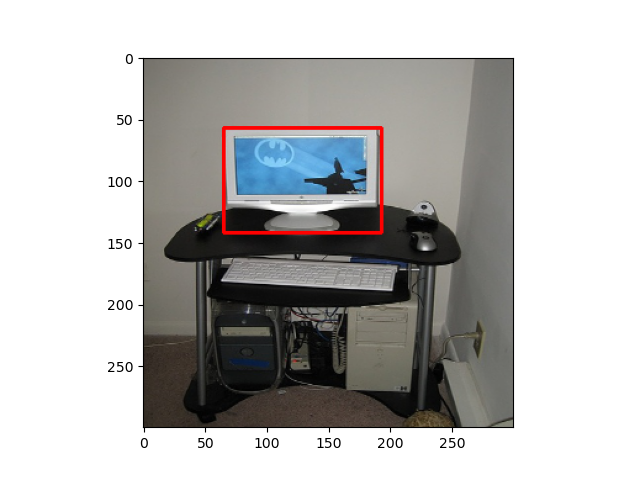

In [4]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import cv2

indices = [1, 100, 150]

for index in indices:
    img, targets = train_dataset[index]
    
    locs, confs = targets[:, :4], targets[:, 4:]
    
    img = toVisualizeRectangleimg(img, locs, verbose=True)
    
    plt.figure()
    plt.imshow(img)